In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
# api.competition_download_files('dogs-vs-cats',path='../data/raw')

In [2]:
import zipfile 
import os

with zipfile.ZipFile('../data/raw/dogs-vs-cats.zip','r') as file:
    file.extractall('../data/raw/unzipped')

with zipfile.ZipFile('../data/raw/unzipped/test1.zip','r') as file:
    file.extractall('../data/raw/unzipped/test/')


with zipfile.ZipFile('../data/raw/unzipped/train.zip','r') as file:
    file.extractall('../data/raw/unzipped/')

In [3]:
import re
import shutil
import pathlib
cat_folder = 'cat'
dog_folder = 'dog'
x = None
if x:
    for dirname,filename,image in os.walk('../data/raw/unzipped/train'):
        print(f'{len(filename)} is {len(image)} in {dirname}')
        # print(str(image))

        if os.path.exists('data/raw/unzipped/train1'):
            break
        else:
            os.makedirs('data/raw/unzipped/rain1',exist_ok=True)
            for i in image:
                if str(i).split('.')[0] == cat_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/cat')
            
                elif str(i).split('.')[0] == dog_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/dog')
                
    

In [4]:
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms,models

In [5]:
transforms_train = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.AutoAugment(),
    transforms.ToTensor()
])
transforms_test = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [6]:
train_dataset = datasets.ImageFolder('../data/raw/unzipped/train1',transform=transforms_test)

In [7]:
train_dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [8]:
test_dataset = datasets.ImageFolder('../data/raw/unzipped/test',transform=transforms_test)

In [9]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: ../data/raw/unzipped/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [10]:
img,label = train_dataset[0]

In [11]:
TRAIN_SIZE = int((len(train_dataset)*0.8))
VALIDATION_SIZE = int(len(train_dataset)*0.2)

In [12]:
TRAIN_SIZE

20000

In [13]:
train_dataset,validation_dataset = torch.utils.data.random_split(train_dataset,[TRAIN_SIZE,VALIDATION_SIZE])

In [14]:
img,label = validation_dataset[0]

In [15]:
img

tensor([[[0.4667, 0.4157, 0.4118,  ..., 0.2235, 0.1451, 0.3490],
         [0.4471, 0.4039, 0.4667,  ..., 0.2078, 0.1725, 0.3882],
         [0.5882, 0.4314, 0.5020,  ..., 0.1961, 0.1843, 0.4118],
         ...,
         [0.4471, 0.4353, 0.4510,  ..., 0.5412, 0.5412, 0.5373],
         [0.4471, 0.4510, 0.4549,  ..., 0.5451, 0.5490, 0.5490],
         [0.4275, 0.4431, 0.4549,  ..., 0.5490, 0.5412, 0.5412]],

        [[0.2941, 0.3255, 0.4000,  ..., 0.2627, 0.2039, 0.4588],
         [0.2627, 0.2941, 0.4314,  ..., 0.2510, 0.2431, 0.5020],
         [0.4039, 0.2863, 0.4314,  ..., 0.2471, 0.2745, 0.5373],
         ...,
         [0.4431, 0.4314, 0.4510,  ..., 0.5529, 0.5529, 0.5490],
         [0.4431, 0.4471, 0.4510,  ..., 0.5608, 0.5608, 0.5608],
         [0.4235, 0.4392, 0.4510,  ..., 0.5608, 0.5529, 0.5529]],

        [[0.4235, 0.3882, 0.4118,  ..., 0.4039, 0.4000, 0.7216],
         [0.3765, 0.3490, 0.4314,  ..., 0.4000, 0.4588, 0.7843],
         [0.5255, 0.3686, 0.4667,  ..., 0.4039, 0.5098, 0.

In [16]:
import torch
from torch import nn
import torchinfo
device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
device

'cuda'

In [18]:
class TinyVGGV0(nn.Module):
    def __init__(self,input_features,hidden_state,output_features):
        super().__init__()
        
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )

        self.conv_layer_2 = nn.Sequential(
                   nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*16*16,out_features=output_features)
        )

    def forward(self,x):
        x = self.conv_layer_1(x)
        # print(f' After first conv1 layer : {x.shape}')
        x = self.conv_layer_2(x)
        # print(f' After second conv2 layer : {x.shape}')
        return self.layer_stack(x)

In [19]:
BATCH_SIZE = 32
train_dataset_laoder = DataLoader(train_dataset,BATCH_SIZE,shuffle=True,num_workers=os.cpu_count())
validation_dataset_loader = DataLoader(validation_dataset,BATCH_SIZE,shuffle=False,num_workers=os.cpu_count())
Dtest_dataset_loader = DataLoader(test_dataset,BATCH_SIZE,shuffle=False,num_workers=os.cpu_count())

In [20]:
model_0 = TinyVGGV0(3,hidden_state=10,output_features=2).to(device)

In [21]:
torchinfo.summary(model_0,input_size=[32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGV0                                [32, 2]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [22]:

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters())

In [23]:
def train_step(model,dataloader,loss_fn,optimizer,device=device):
    model.train()

    train_loss,train_accuracy = 0,0

    for batch,(X,y) in enumerate(dataloader):

        X,y = X.to(device),y.to(device)

        y_preds = model(X)

        loss = loss_fn(y_preds,y)

        train_loss += loss.item()

        accuracer = torch.argmax(torch.softmax(y_preds,dim=1),dim=1)

        train_accuracy += (accuracer==y).sum().item()/len(y_preds)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)
    return train_loss,train_accuracy

In [24]:
def validation_step(model,dataloader,loss_fn,device=device):
    model.eval()

    test_loss,test_accuracy = 0,0

    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device),y.to(device)

            y_pred = model(X)

            loss  = loss_fn(y_pred,y)

            test_loss += loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)

            test_accuracy += (y_pred_class == y).sum().item()/len(y_pred)

        test_loss /= len(dataloader)
        test_accuracy /= len(dataloader)
        return test_loss,test_accuracy

In [25]:
def train_model(model,train_loader,test_loader,loss_fn,optimizer,epochs,device=device):
    from tqdm.auto import tqdm
    results = {"train_loss" : [],
               "train_acc": [],
               "test_loss": [],
               "test_acc":[]}
    for epoch in tqdm(range(epochs)):
        print(f'Epoch {epoch} ---------------\n')

        train_loss,train_accuracy = train_step(model,train_loader,loss_fn,optimizer,device=device)
        test_loss,test_accuracy = validation_step(model,test_loader,loss_fn,device=device)

        print(f'Train Loss {train_loss} Train Accuracy {train_accuracy} \n Test Loss {test_loss} Test Accuracy {test_accuracy}')

        results["test_loss"].append(test_loss)
        results['test_acc'].append(test_accuracy)
        results['train_acc'].append(train_accuracy)
        results['train_loss'].append(train_loss)

    return results

In [26]:
results = train_model(model_0,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 ---------------



 10%|█         | 1/10 [01:22<12:21, 82.42s/it]

Train Loss 0.678591723537445 Train Accuracy 0.5671 
 Test Loss 0.6454240994848264 Test Accuracy 0.6323646496815286
Epoch 1 ---------------



 20%|██        | 2/10 [02:40<10:39, 79.89s/it]

Train Loss 0.6292121361255646 Train Accuracy 0.6467 
 Test Loss 0.6092782185715475 Test Accuracy 0.6765525477707006
Epoch 2 ---------------



 30%|███       | 3/10 [03:57<09:11, 78.75s/it]

Train Loss 0.5749384841442108 Train Accuracy 0.70045 
 Test Loss 0.5563405776859089 Test Accuracy 0.7223328025477707
Epoch 3 ---------------



 40%|████      | 4/10 [05:14<07:46, 77.83s/it]

Train Loss 0.5307958310604095 Train Accuracy 0.7367 
 Test Loss 0.5356764261889609 Test Accuracy 0.7402468152866242
Epoch 4 ---------------



 50%|█████     | 5/10 [06:30<06:26, 77.24s/it]

Train Loss 0.5023383686065673 Train Accuracy 0.7616 
 Test Loss 0.5133547190647976 Test Accuracy 0.7559713375796179
Epoch 5 ---------------



 60%|██████    | 6/10 [07:48<05:09, 77.48s/it]

Train Loss 0.48548415749073026 Train Accuracy 0.76805 
 Test Loss 0.5037701898699354 Test Accuracy 0.7635350318471338
Epoch 6 ---------------



 70%|███████   | 7/10 [09:04<03:51, 77.04s/it]

Train Loss 0.47274358139038086 Train Accuracy 0.7783 
 Test Loss 0.5044390703462491 Test Accuracy 0.7687101910828026
Epoch 7 ---------------



 80%|████████  | 8/10 [10:22<02:34, 77.29s/it]

Train Loss 0.4583208216428757 Train Accuracy 0.7863 
 Test Loss 0.5045267652933765 Test Accuracy 0.7663216560509554
Epoch 8 ---------------



 90%|█████████ | 9/10 [11:38<01:16, 76.89s/it]

Train Loss 0.4500110958337784 Train Accuracy 0.7921 
 Test Loss 0.4757613074627651 Test Accuracy 0.7792595541401274
Epoch 9 ---------------



100%|██████████| 10/10 [12:55<00:00, 77.51s/it]

Train Loss 0.4359360311985016 Train Accuracy 0.80105 
 Test Loss 0.47946559500162766 Test Accuracy 0.7852308917197452


In [27]:
from torchvision import models

In [28]:
def EfficienNet_model(pretrained=True,fine_tuned= True,num_classes=2):
    if pretrained:
        print('[INFO] LOADING PRETRAINED WEIGHTS')

    else:
        print('[INFO] NOT LOADING PRETRAINED WEIGHTS')
    model = models.efficientnet_b2(pretrained = pretrained)

    if fine_tuned:
        print('[INFO] Fine-tuning all-layers..')
        for params in model.parameters():
            params.requires_grad = True
    elif not fine_tuned:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    model.classifier[1] = nn.Linear(in_features=1408,out_features= num_classes)
    return model

In [29]:
model_1 =  EfficienNet_model(pretrained=True,fine_tuned= True).to(device)

[INFO] LOADING PRETRAINED WEIGHTS


c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO] Fine-tuning all-layers..


In [30]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_1.parameters())

In [31]:
results_Efficient_NET = train_model(model_1,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 ---------------



 10%|█         | 1/10 [01:58<17:46, 118.54s/it]

Train Loss 0.3310688213944435 Train Accuracy 0.8565 
 Test Loss 0.1974315347897399 Test Accuracy 0.9195859872611465
Epoch 1 ---------------



 20%|██        | 2/10 [03:54<15:36, 117.07s/it]

Train Loss 0.1842671175569296 Train Accuracy 0.92665 
 Test Loss 0.15631259770197853 Test Accuracy 0.9345143312101911
Epoch 2 ---------------



 30%|███       | 3/10 [05:48<13:30, 115.78s/it]

Train Loss 0.12145290610864759 Train Accuracy 0.95435 
 Test Loss 0.17663386269549655 Test Accuracy 0.9331210191082803
Epoch 3 ---------------



 40%|████      | 4/10 [07:47<11:42, 117.07s/it]

Train Loss 0.09767563297599555 Train Accuracy 0.96245 
 Test Loss 0.1795882267497812 Test Accuracy 0.9285429936305732
Epoch 4 ---------------



 50%|█████     | 5/10 [09:41<09:39, 115.86s/it]

Train Loss 0.07808468273766339 Train Accuracy 0.96965 
 Test Loss 0.16546041332778466 Test Accuracy 0.9351114649681529
Epoch 5 ---------------



 60%|██████    | 6/10 [11:37<07:44, 116.04s/it]

Train Loss 0.06427345790397376 Train Accuracy 0.9765 
 Test Loss 0.1681035481494181 Test Accuracy 0.9400875796178344
Epoch 6 ---------------



 70%|███████   | 7/10 [13:34<05:48, 116.18s/it]

Train Loss 0.05705080909412354 Train Accuracy 0.97885 
 Test Loss 0.16921300689577107 Test Accuracy 0.9408837579617835
Epoch 7 ---------------



 80%|████████  | 8/10 [15:28<03:50, 115.46s/it]

Train Loss 0.04872205804315163 Train Accuracy 0.9811 
 Test Loss 0.1935259841744355 Test Accuracy 0.9428742038216561
Epoch 8 ---------------



 90%|█████████ | 9/10 [17:22<01:55, 115.20s/it]

Train Loss 0.05411596630034037 Train Accuracy 0.9796 
 Test Loss 0.19130272862863293 Test Accuracy 0.9376990445859873
Epoch 9 ---------------



100%|██████████| 10/10 [19:17<00:00, 115.80s/it]

Train Loss 0.045288269410841166 Train Accuracy 0.9843 
 Test Loss 0.19810074409596018 Test Accuracy 0.9396894904458599


In [ ]:
def DenseNet_model(fine_tuned=True, num_classes=2):

    model = models.densenet169(pretrained=True)

   
    if fine_tuned:
        print('[INFO] Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    else:
        print('[INFO] Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    model.classifier = nn.Sequential(
        nn.Linear(in_features=1664, out_features=1024), 
        nn.ReLU(),
        nn.Dropout(0.5), 
        nn.Linear(1024, num_classes)  
    )
    
    return model

In [33]:
model_2 = DenseNet_model().to(device)

c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO] Fine-tuning all layers...


In [34]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_2.parameters())

In [35]:
results_DenseNet_NET = train_model(model_2,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 ---------------



 10%|█         | 1/10 [02:30<22:35, 150.61s/it]

Train Loss 0.4257818376302719 Train Accuracy 0.8115 
 Test Loss 0.4325523793127886 Test Accuracy 0.8061305732484076
Epoch 1 ---------------



 20%|██        | 2/10 [04:58<19:53, 149.21s/it]

Train Loss 0.2800467232108116 Train Accuracy 0.8836 
 Test Loss 0.29281274950618197 Test Accuracy 0.8929140127388535
Epoch 2 ---------------



 30%|███       | 3/10 [07:26<17:19, 148.43s/it]

Train Loss 0.22063651666641235 Train Accuracy 0.9107 
 Test Loss 0.2512932825999655 Test Accuracy 0.8947054140127388
Epoch 3 ---------------



 40%|████      | 4/10 [09:52<14:44, 147.45s/it]

Train Loss 0.3096795393109322 Train Accuracy 0.8678 
 Test Loss 0.38871244013689127 Test Accuracy 0.8316082802547771
Epoch 4 ---------------



 50%|█████     | 5/10 [12:16<12:10, 146.12s/it]

Train Loss 0.26709395704567435 Train Accuracy 0.8928 
 Test Loss 0.27665898528922894 Test Accuracy 0.89171974522293
Epoch 5 ---------------



 60%|██████    | 6/10 [14:43<09:46, 146.56s/it]

Train Loss 0.1759983758509159 Train Accuracy 0.92985 
 Test Loss 0.22372539723469953 Test Accuracy 0.9092356687898089
Epoch 6 ---------------



 70%|███████   | 7/10 [17:10<07:19, 146.62s/it]

Train Loss 0.1502228457391262 Train Accuracy 0.94085 
 Test Loss 0.24178810994241648 Test Accuracy 0.9068471337579618
Epoch 7 ---------------



 80%|████████  | 8/10 [19:37<04:53, 146.85s/it]

Train Loss 0.13338007597252727 Train Accuracy 0.9466 
 Test Loss 0.20667872396386733 Test Accuracy 0.9205812101910829
Epoch 8 ---------------



 90%|█████████ | 9/10 [22:04<02:26, 146.91s/it]

Train Loss 0.1106377739213407 Train Accuracy 0.95625 
 Test Loss 0.22033418567886778 Test Accuracy 0.9120222929936306
Epoch 9 ---------------



100%|██████████| 10/10 [24:30<00:00, 147.06s/it]

Train Loss 0.10533593858331441 Train Accuracy 0.9603 
 Test Loss 0.232233722142543 Test Accuracy 0.9064490445859873


In [36]:
def show_models(results):
    import matplotlib.pyplot as plt
    epochs = range(len(results['test_loss']))
    plt.subplot(1,2,1)
    plt.plot(epochs,results['test_loss'],label='test_loss')
    plt.plot(epochs,results['train_loss'],label='train_loss')
    plt.legend()
    plt.title('Loss')
    plt.subplot(1,2,2)
    plt.plot(epochs,results['train_acc'],label='train_acc')
    plt.plot(epochs,results['test_acc'],label='test_acc')
    plt.legend()
    plt.title('Accuracy')
    

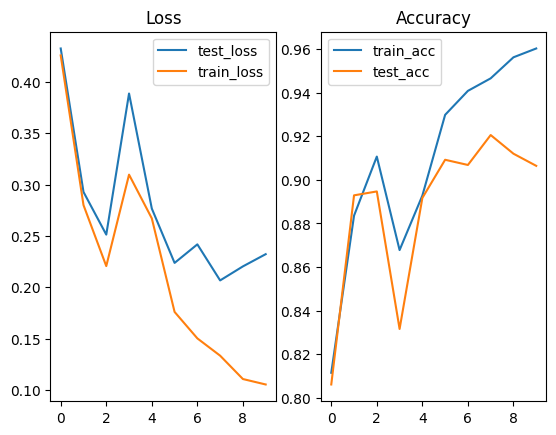

In [37]:
show_models(results_DenseNet_NET)

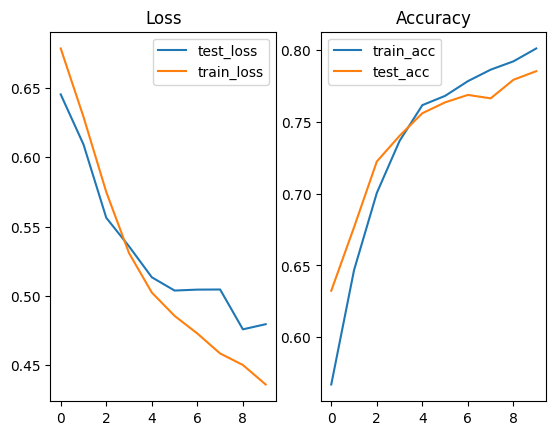

In [38]:
show_models(results)

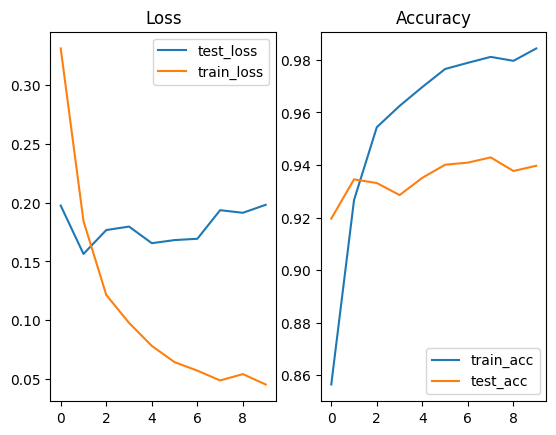

In [39]:
show_models(results_Efficient_NET)